In [13]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt 

In [12]:
# city_list = pd.read_csv("city_list.csv")
city_data = pd.read_csv("city_data.csv")
global_data = pd.read_csv("global_data.csv")

In [3]:
city_list.dropna(inplace=True)
city_list = city_list.reset_index(drop=True)

In [4]:
city_list

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1856,Abidjan,Côte D'Ivoire,26.28
4,1857,Abidjan,Côte D'Ivoire,25.17
...,...,...,...,...
68240,2009,Zapopan,Mexico,21.76
68241,2010,Zapopan,Mexico,20.90
68242,2011,Zapopan,Mexico,21.55
68243,2012,Zapopan,Mexico,21.52


In [5]:
berlin_temp = city_list.loc[city_list['city'] == "Berlin"]
berlin_temp = berlin_temp.reset_index(drop=True)

<AxesSubplot:>

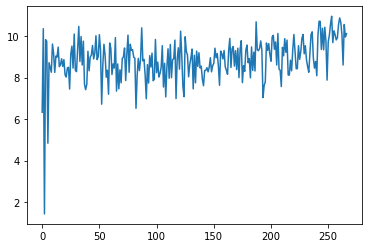

In [6]:
berlin_temp['avg_temp'].plot.line()

<AxesSubplot:>

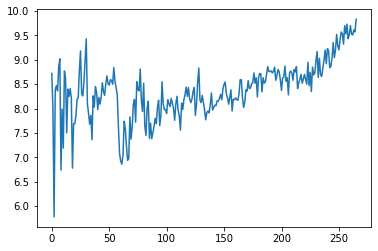

In [7]:
global_data['avg_temp'].plot.line()

In [22]:
mv_berlin = berlin_temp['avg_temp'].rolling(20).mean()
mv_global = global_data['avg_temp'].rolling(20).mean()

<AxesSubplot:>

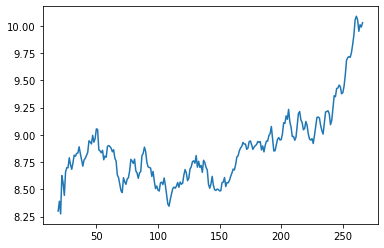

In [23]:
mv_berlin.plot.line()

<AxesSubplot:>

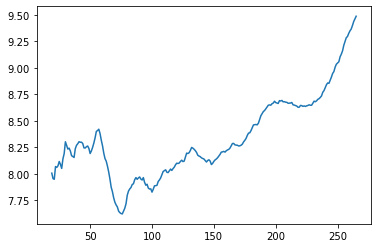

In [24]:
mv_global.plot.line()

In [25]:
temp = pd.concat([mv_berlin, mv_global], axis=1)
x = list(range(0, len(temp)))
len(x), len(temp)

(267, 267)

In [34]:
berlin_temp

,year,city,country,avg_temp
0,1743,Berlin,Germany,6.33
1,1744,Berlin,Germany,10.36
2,1745,Berlin,Germany,1.43
3,1750,Berlin,Germany,9.83
4,1751,Berlin,Germany,9.75
...,...,...,...,...
262,2009,Berlin,Germany,10.06
263,2010,Berlin,Germany,8.61
264,2011,Berlin,Germany,10.56
265,2012,Berlin,Germany,9.96


In [26]:
temp.columns.values[0] = "local_temp"
temp.columns.values[1] = "global_temp"

In [35]:
temp['year'] = berlin_temp['year']

In [36]:
temp

,local_temp,global_temp,year
0,NaN,NaN,1743
1,NaN,NaN,1744
2,NaN,NaN,1745
3,NaN,NaN,1750
4,NaN,NaN,1751
...,...,...,...
262,10.054,9.3985,2009
263,9.949,9.4355,2010
264,10.009,9.4620,2011
265,9.988,9.4860,2012


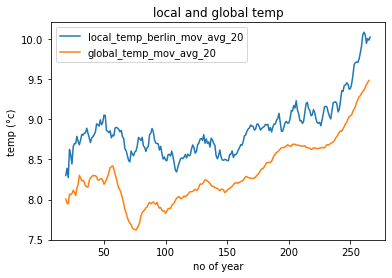

In [38]:
plt.plot(x, temp['local_temp'], label='local_temp_berlin_mov_avg_20')
plt.plot(x, temp['global_temp'], label='global_temp_mov_avg_20')
plt.legend()
plt.title('local and global temp')
plt.xlabel('no of year')
plt.ylabel('temp (°c)')
plt.show()

In [11]:
berlin_l = berlin_temp['avg_temp']
global_g = global_data['avg_temp']

In [12]:
temp_full = pd.concat([berlin_l, global_g], axis=1)

In [17]:
temp_full.columns.values[0] = "local_temp_f"
temp_full.columns.values[1] = "global_temp_f"
x = list(range(0, len(temp_full)))
len(x), len(temp_full)

(267, 267)

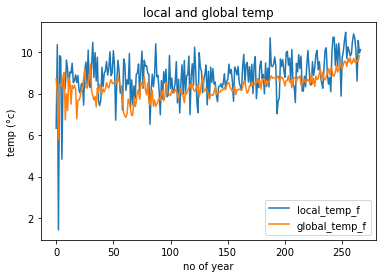

In [18]:
plt.plot(x, temp_full['local_temp_f'], label='local_temp_f')
plt.plot(x, temp_full['global_temp_f'], label='global_temp_f')
plt.legend()
plt.title('local and global temp')
plt.xlabel('no of year')
plt.ylabel('temp (°c)')
plt.show()